# Deep Learning

Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

d:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


4423680/4422102 [==============================] - 17s 4us/step


## Visualizing the Data

In [1]:
import cv2
import matplotlib.pyplot as plt

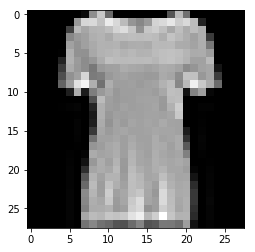

In [12]:
plt.imshow(x_train[10],cmap = 'gray')

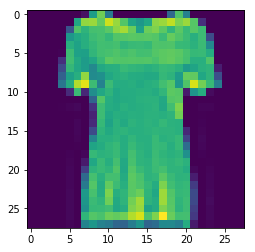

In [13]:
plt.imshow(x_train[10])

## Preprocessing the Data

In [9]:
x_train.max()

255

In [10]:
x_test = x_test/255
x_train = x_train/255

In [11]:
x_train.max()

1.0

In [15]:
x_train.shape


(60000, 28, 28)

In [16]:
x_train = x_train.reshape(60000 , 28 , 28 , 1)

In [18]:
x_test = x_test.reshape(10000 , 28 , 28 , 1)

In [19]:
from keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [22]:
y_cat_train[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Building the Model

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dense , Flatten 

In [26]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [28]:
model.fit(x_train,y_cat_train,epochs=6,batch_size=256)

Epoch 1/6
60000/60000 [==============================] - 48s 804us/step - loss: 0.5591 - acc: 0.8042
Epoch 2/6
60000/60000 [==============================] - 50s 831us/step - loss: 0.3440 - acc: 0.8761
Epoch 3/6
60000/60000 [==============================] - 47s 778us/step - loss: 0.2926 - acc: 0.8951
Epoch 4/6
60000/60000 [==============================] - 45s 747us/step - loss: 0.2611 - acc: 0.9044
Epoch 5/6
60000/60000 [==============================] - 46s 765us/step - loss: 0.2380 - acc: 0.9130
Epoch 6/6
60000/60000 [==============================] - 45s 755us/step - loss: 0.2187 - acc: 0.9192


### Evaluating the Model

In [29]:
model.metrics_names

['loss', 'acc']

In [30]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 396us/step


[0.3452649432420731, 0.8716]

In [31]:
from sklearn.metrics import classification_report

In [32]:
predictions  = model.predict_classes(x_test)

In [33]:
y_cat_test.shape

(10000, 10)

In [34]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [35]:
predictions[0]

9

In [37]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.71      0.80      1000
          1       1.00      0.96      0.98      1000
          2       0.85      0.78      0.81      1000
          3       0.86      0.94      0.90      1000
          4       0.95      0.55      0.70      1000
          5       0.97      0.99      0.98      1000
          6       0.53      0.89      0.67      1000
          7       0.95      0.98      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.95      0.97      1000

avg / total       0.90      0.87      0.87     10000

